# 11 - Querying the Detections Database using the GUI

In Notebook #03, you learned how to query and access the detections HDF5 file through the Detection API. Here we show how to use a user friendly GUI to first initialize the Detections class then query the database. When you initiate via the API, you automatically receive a culled database in which bad detections due to bad amps, bad shots or software issues are removed. You can also opt to remove very bright stars with the removestars=True flag.

### First initiate the API

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from hetdex_api.detections import *

Run this to prevent scrolling in individual cells

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
detects = Detections('hdr1')

### Run the script to create the GUI

This will generate a GUI that will allow you to create your desired search criteria. 

In [4]:
%run ../HETDEX_API/hetdex_api/detwidgets.py

Either select a specific field or multiple fields (command-click to select multiple fields):



U2VsZWN0TXVsdGlwbGUoZGVzY3JpcHRpb249dSdGaWVsZDonLCBpbmRleD0oMCwpLCBvcHRpb25zPSgnYWxsJywgJ2RleC1zcHJpbmcnLCAnZGV4LWZhbGwnLCAnY29zbW9zJywgJ2VncycsICfigKY=


Or manually enter an RA, DEC and aperture:



SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oTGFiZWwodmFsdWU9dSdSQSAoZGVncmVlcyknLCBsYXlvdXQ9TGF5b3V0KGhlaWdodD11JzM1cHgnLCB3aWR0aD11JzEwMCUnKSksIExhYmXigKY=


Checkbox(value=False, description=u'Check to Select from aperture')

You may also wish to consider some down selections:


SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oTGFiZWwodmFsdWU9dScnLCBsYXlvdXQ9TGF5b3V0KGhlaWdodD11JzM1cHgnLCB3aWR0aD11JzEwMCUnKSksIExhYmVsKHZhbHVlPXUnc3TigKY=


Button(button_style=u'success', description=u'Select Detections', style=ButtonStyle())

Query limits saved to query.pickle


## Results are saved to query.pickle file

When you are satisfied with your selection criteria, you can press the Select Detections button and the widget will save all the query bounds in a dictionary instance object called `limits`. You can see the contents like this:

In [7]:
limits.__dict__

{'aperture_flag': False,
 'chi2_high': 0.0,
 'chi2_low': 0.0,
 'cont_high': 0.0,
 'cont_low': 0.0,
 'dec': 0.0,
 'field': ('dex-spring', 'dex-fall'),
 'flux_high': 0.0,
 'flux_low': 0.0,
 'linewidth_high': 0.0,
 'linewidth_low': 0.0,
 'ra': 0.0,
 'rad': 0.0,
 'sn_high': 0.0,
 'sn_low': 0.0,
 'wave_high': 0.0,
 'wave_low': 0.0}

If you want to query an aperture, you must click the "Check to Select from Aperture" box to set the aperture_flag to True. Otherwise it will go by field selection. You can then either use the `limits` dictionary or the saved pickle file "query.pickle" to select rows from the Detections class table. Rename your pickle file if you want to save it for future use, otherwise it will be overwritten by the GUI above when used again.

For example, here is how you would query the current limits dictionary:

In [8]:
mask = detects.query_by_dictionary(limits)
print(np.sum(mask))

Subselecting for field(s): ('dex-spring', 'dex-fall')
506072


Or you can query from the pickle file saved upon pressing the button above:

In [9]:
mask = detects.query_by_pickle('query.pickle')
print(np.sum(mask))

Subselecting for field(s): ('dex-spring', 'dex-fall')
506072


The result is a mask that can be applied to the Detections class table.

## An example: comparing the wavelength distribution of detections for DEX and COSMOS shots respectively

For example, here are two queries I saved previously that selected all detections in the DEX and COSMOS fields respectively:

In [10]:
maskdex = detects.query_by_pickle('dex.pickle')
maskcosmos = detects.query_by_pickle('cosmos.pickle')
print(np.sum(maskdex), np.sum(maskcosmos))

Subselecting for field(s): ('dex-spring', 'dex-fall')
Subselecting for field(s): ('cosmos',)
(284441, 10800)


Here I will plot up the distribution of detections as a function of wavelength for each sample:

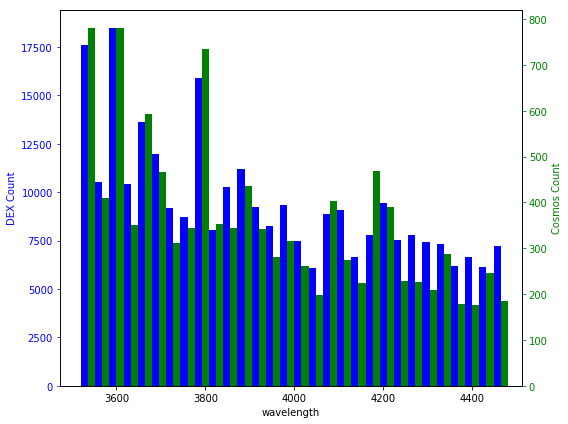

In [11]:
colors = ['b','g']
#sets up the axis and gets histogram data
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
y1 = detects.wave[maskdex]
y2 = detects.wave[maskcosmos]
nbins = 30
ax1.hist([y1, y2], color=colors, bins=nbins)
n, bins, patches = ax1.hist([y1,y2], bins=nbins)
ax1.cla() #clear the axis

#plots the histogram data
width = (bins[1] - bins[0]) *0.5
bins_shifted = bins + width
ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0])
ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1])

#finishes the plot
ax1.set_ylabel("DEX Count", color=colors[0])
ax2.set_ylabel("Cosmos Count", color=colors[1])
ax1.set_xlabel('wavelength')
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
plt.tight_layout()
plt.savefig('count_vs_wave.png')